# Principal Component Analysis
- A feature extraction technique.
- Instead of describing the data with the original features, PCA describes it with its axes of variation. 
- Axes of variation refer to the directions in which your data varies the most.
- The axes of variation become the new features. 
- The principal components become the new features by a rotation of the dataset in the feature space.

### New Features (Principal Components):
- These are linear combinations of the original features.
- They are uncorrelated with each other (orthogonal).
- Each new feature (component) captures a certain amount of variance in the data.
- The first component captures the most variance, the second the next most (and so on).

### Why create new features?
- Reduce dimensionality to speed up learning.
- Remove noise or redundancy (if some features are correlated).
- Visualize high-dimensional data in 2D/3D.

## Imports

In [1]:
# Load libraries 
from sklearn.preprocessing import StandardScaler 
from sklearn.decomposition import PCA
from sklearn import datasets

## The Digit Dataset
- This dataset is made up of 1797 8x8 grayscale images of hand-written digits.
- In sklearn, each digir is stored as a feature vector of length 64..

In [2]:
# Load the data 
digits = datasets.load_digits() 

In [4]:
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [3]:
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [4]:
len(digits.data)

1797

In [5]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

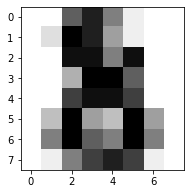

In [6]:
import matplotlib.pyplot as plt

# Display the last digit
plt.figure(1, figsize=(3, 3))
plt.imshow(digits.images[-1], cmap=plt.cm.gray_r, interpolation="nearest")
plt.show()

## Running PCA

In [8]:
# Standardize the feature matrix
features = StandardScaler().fit_transform(digits.data) 

In [13]:
# Create a PCA that will retain 99% of variance 

pca = PCA(n_components=0.99, whiten=True)  
# n_components=0.99, keeps enough components to explain at least 95% of the variance in the dataset.
#pca = PCA(n_components=10, whiten=True) 
# n_components=10, keeps 10 most imporatnt features
# whiten=True scales each principal component to have unit variance. 
# This is the "whitening" step — it transforms the data to be like white noise (uncorrelated and standardized).

# Conduct PCA 
features_pca = pca.fit_transform(features) 

In [14]:
# Show results 
print("Original number of features:", features.shape[1]) 
print("Reduced number of features:", features_pca.shape[1])

Original number of features: 64
Reduced number of features: 54


In [15]:
print("PCA component shape: {}".format(pca.components_.shape)) 
# pca.components_ is a 2D NumPy array of shape (n_components, n_features)
# where:
# Each row is a principal component (i.e., a direction in feature space).
# Each column shows how much that original feature contributes to that component.

PCA component shape: (54, 64)


In [26]:
print("PCA components:\n{}".format(pca.components_)) 

PCA components:
[[ 1.21482737e-18 -1.82233917e-01 -2.85867997e-01 ... -1.03198001e-01
  -1.19810604e-01 -7.14936163e-02]
 [-7.62433540e-19  4.70270076e-02  5.95647953e-02 ... -2.42617777e-01
  -1.65089262e-01 -7.13292370e-02]
 [-3.56880226e-18  2.35882143e-02 -5.67987457e-02 ... -2.22795243e-02
   1.00365586e-01  9.24458865e-02]
 ...
 [ 4.82989434e-18 -2.36573940e-02 -2.15711594e-02 ...  1.46857639e-02
  -7.04598280e-02  2.03743055e-02]
 [-4.23282686e-18 -1.59521850e-01 -2.79407118e-03 ...  1.02094964e-01
   1.00130796e-01 -9.54418079e-02]
 [ 7.46301185e-19 -2.03051327e-01 -7.68724457e-02 ... -1.10157994e-01
   8.59937001e-02 -2.98885846e-02]]


In [16]:
pca.explained_variance_ratio_ 
# Component 1 explains 12% variance, 
# Component 2 explains 9% variance, etc.

array([0.12033916, 0.09561054, 0.08444415, 0.06498408, 0.04860155,
       0.0421412 , 0.03942083, 0.03389381, 0.02998221, 0.02932003,
       0.02781805, 0.02577055, 0.02275303, 0.0222718 , 0.02165229,
       0.01914167, 0.01775547, 0.01638069, 0.0159646 , 0.01489191,
       0.0134797 , 0.01271931, 0.01165837, 0.01057647, 0.00975316,
       0.00944559, 0.00863014, 0.00836643, 0.00797693, 0.00746471,
       0.00725582, 0.00691911, 0.00653909, 0.00640793, 0.00591384,
       0.00571162, 0.00523637, 0.00481808, 0.00453719, 0.00423163,
       0.00406053, 0.00397085, 0.00356493, 0.00340787, 0.00327835,
       0.00311032, 0.00288575, 0.00276489, 0.00259175, 0.00234483,
       0.00218257, 0.00203598, 0.00195512, 0.00183318])

## Reducing Features When Data is Linearly Inseparable 

In [17]:
# Load libraries 
from sklearn.decomposition import PCA, KernelPCA 
from sklearn.datasets import make_circles 

In [18]:
# Create linearly inseparable data 
features, _ = make_circles(n_samples=1000, random_state=1, noise=0.1,factor=0.1) 

In [19]:
features

array([[ 0.23058395, -0.10671314],
       [-0.0834218 , -0.22647078],
       [ 0.9246533 , -0.71492522],
       ...,
       [ 0.02517206,  0.00964548],
       [-0.92836187,  0.06693357],
       [ 1.03502248,  0.54878286]])

In [34]:
# Apply kernal PCA with radius basis function (RBF) kernel 
# Kernels allow to project the linearly inseparable data into a higher dimension where it is linearly 
# separable
kpca = KernelPCA(kernel="rbf", gamma=15, n_components=1) 
features_kpca = kpca.fit_transform(features) 
print("Original number of features:", features.shape[1]) 
print("Reduced number of features:", features_kpca.shape[1]) 

Original number of features: 2
Reduced number of features: 1
